# Crime against women in India  

## Summary of data:  

This data is collated from https://data.gov.in. It has state-wise data on the various crimes committed against women between 2001 to 2021. Some crimes that are included are Rape, Kidnapping and Abduction, Dowry Deaths etc.  

Following is the complete description of the columns present,  

State - State  
Year - Year  
Rape - No. of Rape cases  
K&A - Kidnap And Assault  
DD - Dowry Deaths  
AoW - Assault against women  
AoM - Assault against modesty of women  
DV - Domestic violence  
WT- Women Trafficking   

There are a total of 736 rows with 9 different columns present in the dataset.  

### Objective of analysis:  

To find which state has highest rape cases against women.  
Is the trend of such cases decreasing in that state over the period of years.  
What is the mean of rape cases in a period of 25 years and how much different is that from the highest occuring state.  

### Approach:

Importing the pandas libraries for loading the data to a dataframe.  
Quick head visual of the loaded dataframe to understand the data. 
Able to find the column "Unnamed: 0" is just a duplicate of the number columns.  Hence dropping that column.  



In [55]:
import pandas as pd

cowd = pd.read_csv(r'C:\Users\Riaz\Desktop\MSDS\Predictive Analysis\Week 1\CrimesOnWomenData.csv')
print ("Head output of cowd dataframe\n",cowd.head,'\n')
print ("Columns present in cowd dataframe\n",cowd.columns)
cowd_drop = cowd.drop('Unnamed: 0',axis=1)

Head output of cowd dataframe
 <bound method NDFrame.head of      Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  \
0             0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   
1             1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   
2             2              ASSAM  2001   817  1070   59   850     4  1248   
3             3              BIHAR  2001   888   518  859   562    21  1558   
4             4       CHHATTISGARH  2001   959   171   70  1763   161   840   
..          ...                ...   ...   ...   ...  ...   ...   ...   ...   
731         731         D&N Haveli  2021  1250  4083  141  2068   417  4731   
732         732        Daman & Diu  2021   315   904   16  1851    10   501   
733         733           Delhi UT  2021     2     1    0     5     1     9   
734         734        Lakshadweep  2021     0     0    0     1     1     3   
735         735         Puducherry  2021     2     0    2    31     3 

Converting the rows present in State column to upper case,  as there are a mix of both upper and lower case entries for same state name.  
This needs to be done to get the proper results, as we would be doing group by statements on dataframe subsequently.  

In [56]:
cowd_drop['State'] = cowd_drop['State'].str.upper()
cowd_drop

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D&N HAVELI,2021,1250,4083,141,2068,417,4731,4
732,DAMAN & DIU,2021,315,904,16,1851,10,501,1
733,DELHI UT,2021,2,1,0,5,1,9,0
734,LAKSHADWEEP,2021,0,0,0,1,1,3,0


# Bar plot  
Creating a bar plot by the total number of rape cases for different states to find out which state has the highest rate.  
As seen from the code snippet, groupby function has been used to sum the number of rapes per state.  
It is been found out that Madhya Pradesh tops the list followed by Uttar Pradesh, Rajasthan and Maharashtra.  

Text(0, 0.5, 'Number of rape cases')

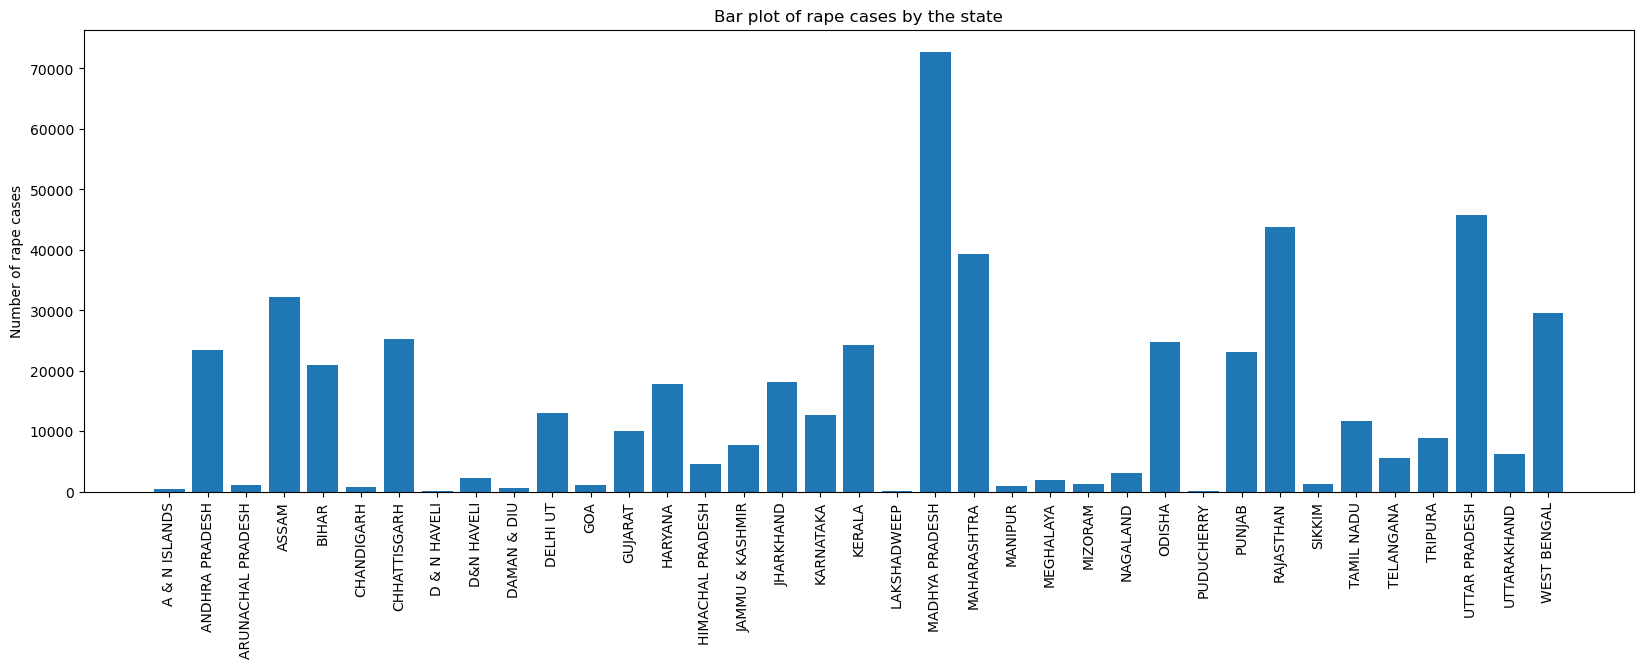

In [57]:
import matplotlib.pyplot as plt
#plt.hist(cowd_drop['Rape'])
cowd_bar=cowd_drop.groupby('State').sum('Rape').drop('Year',axis=1)


plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
plt.bar(cowd_bar.index,cowd_bar['Rape'])
plt.title('Bar plot of rape cases by the state')
plt.ylabel('Number of rape cases')

# Box plot  

From the below box plot, it is found out that median rape cases are around 10000.  
However, there is an outlier state which sits beyond the whiskers and it is found out to be MADHYA PRADESH.  



Text(0.5, 1.0, 'Box plot of rape cases')

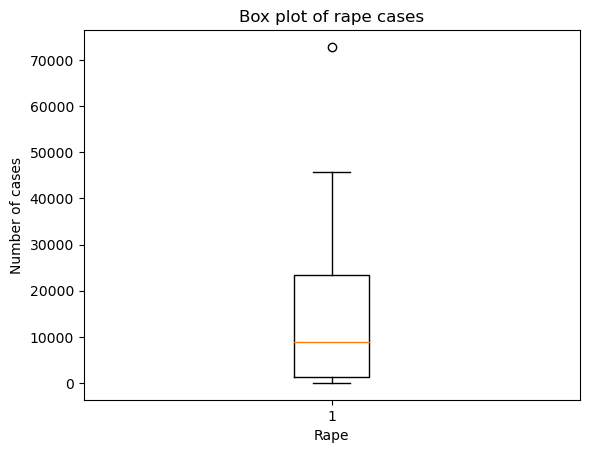

In [58]:
plt.boxplot (cowd_bar['Rape'])
plt.xlabel('Rape')
plt.ylabel('Number of cases')
plt.title('Box plot of rape cases')

In [59]:
cowd_bar[cowd_bar['Rape'] > 50000]

,Rape,K&A,DD,AoW,AoM,DV,WT
State,,,,,,,
MADHYA PRADESH,72808,57485,13316,152000,21631,95521,396


# Bivariate plot  

As from the above results, we see Madhya Pradesh tops the rape cases.  We are plotting to see how is the yearly trend.  
The below plot shows that from the year 2000 to 2017 there has been an increasing trend and from the year 2018, the cases have significantly reduced.  



Text(0.5, 1.0, 'Scatter plot trend of rape cases for Madhya Pradesh')

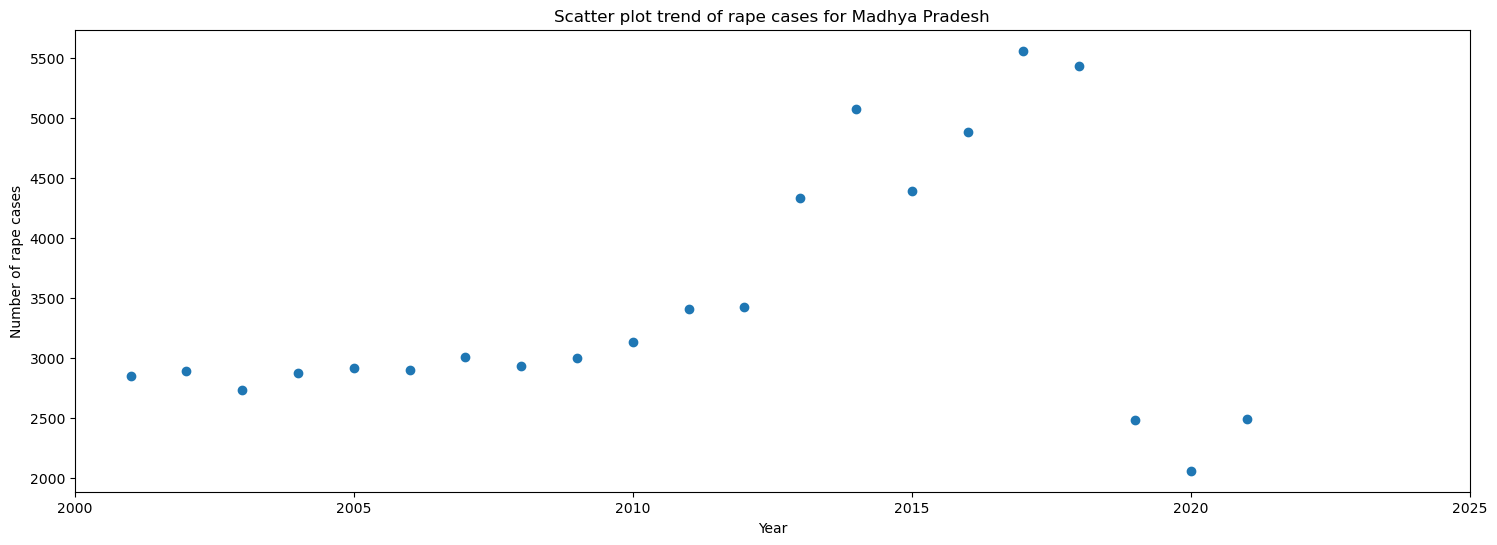

In [60]:
plt.figure(figsize=(18, 6))
plt.scatter(x='Year',y='Rape',data=cowd_drop[cowd_drop['State'] == 'MADHYA PRADESH'])
plt.xlim(2000,2025)
plt.xlabel('Year')
plt.ylabel('Number of rape cases')
plt.title('Scatter plot trend of rape cases for Madhya Pradesh')


# Histogram:  

Plotting a histogram to find out how the data is distributed for all the crimes against women.  
For this, a new total columns has been created by summing up all the columns to get the total number of crimes against women irrespective of the category.  
From the below histogram, it can be inferred that most of the states lie inbetween 0 to 25K cases of crime.  
This is followed by few states lying between 75K to 100K cases.  


In [62]:
cowd_bar['Total'] = cowd_bar[['Rape','K&A','DD','AoW','AoM','DV','WT']].sum(axis=1)
cowd_bar


,Rape,K&A,DD,AoW,AoM,DV,WT,Total
State,,,,,,,,
A & N ISLANDS,424,363,13,558,135,365,10,1868
ANDHRA PRADESH,23424,21707,8165,92084,54684,188511,2548,391123
ARUNACHAL PRADESH,1153,1272,4,1584,97,705,7,4822
ASSAM,32190,71462,2757,47115,2698,135415,343,291980
BIHAR,21006,77687,24428,9953,800,55187,825,189886
CHANDIGARH,795,1547,68,954,281,1689,7,5341
CHHATTISGARH,25178,16536,1797,33310,4382,16381,103,97687
D & N HAVELI,49,77,1,46,4,35,0,212
D&N HAVELI,2294,7071,255,3931,836,7314,12,21713


Text(0.5, 1.0, 'Histogram of all cases')

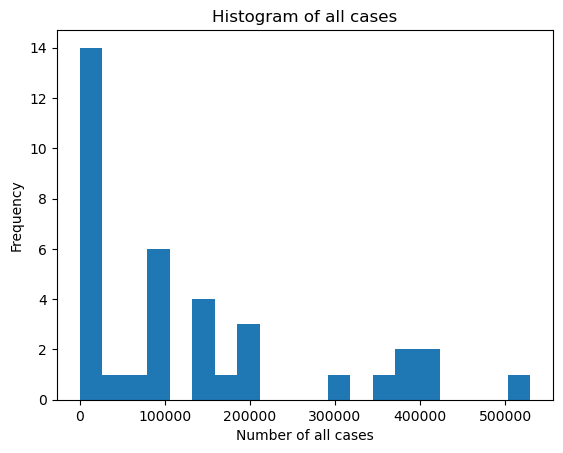

In [63]:
plt.hist(cowd_bar['Total'],bins=20)
plt.xlabel('Number of all cases')
plt.ylabel('Frequency')
plt.title('Histogram of all cases')

# Conclusion:  

By using bar plot, it is been found out that Madhya Pradesh tops the list followed by Uttar Pradesh, Rajasthan and Maharashtra. 
From the box plot, it is found out that median rape cases are around 10000.  
There is an outlier state which sits beyond the whiskers and it is found out to be MADHYA PRADESH, which is really huge when compared to median value.  
From the bivariate plot, we are able to see the increasing trend yearly from  2000 to 2017 but from the year 2018, the cases have significantly reduced.  
From the histogram, it can be inferred that most of the states lie inbetween 0 to 25K cases of crime.  
This is followed by few states lying between 75K to 100K cases.  
